<a href="https://colab.research.google.com/github/FGalvao77/Selective-search/blob/main/Atividade_pr%C3%A1tica_M%C3%B3dulo_4_Introdu%C3%A7%C3%A3o_%C3%A0_Vis%C3%A3o_Computacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Atividade prática: Módulo 4 - Introdução à Visão Computacional**

---



In [ ]:
# função para acessar o google drive através do google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importando as bibliotecas
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

Dentro da pasta `MyDrive` criei uma subpasta nomeada de _images_DogsVsCats_, onde há outra subpasta chamada de **train** com algumas amostras de imagens de cães e gatos.

In [ ]:
# da pasta "images_DogsvsCats" listando as imagens da subpasta "train"
!ls drive/MyDrive/images_DogsVsCats/train

cat.10133.jpg  cat.3093.jpg  cat.7504.jpg   dog.11811.jpg  dog.5434.jpg
cat.10215.jpg  cat.3170.jpg  cat.7552.jpg   dog.11867.jpg  dog.544.jpg
cat.10239.jpg  cat.3530.jpg  cat.7831.jpg   dog.12064.jpg  dog.5587.jpg
cat.1027.jpg   cat.3590.jpg  cat.80.jpg     dog.12174.jpg  dog.558.jpg
cat.10392.jpg  cat.3591.jpg  cat.8262.jpg   dog.12307.jpg  dog.5721.jpg
cat.10852.jpg  cat.3619.jpg  cat.8518.jpg   dog.12335.jpg  dog.5722.jpg
cat.10910.jpg  cat.3859.jpg  cat.8654.jpg   dog.1238.jpg   dog.5901.jpg
cat.10967.jpg  cat.4033.jpg  cat.870.jpg    dog.1331.jpg   dog.6052.jpg
cat.11048.jpg  cat.4061.jpg  cat.8917.jpg   dog.1473.jpg   dog.6073.jpg
cat.11073.jpg  cat.4081.jpg  cat.8929.jpg   dog.15.jpg	   dog.6527.jpg
cat.1126.jpg   cat.4094.jpg  cat.9414.jpg   dog.170.jpg    dog.6550.jpg
cat.11338.jpg  cat.4220.jpg  cat.9417.jpg   dog.1737.jpg   dog.6552.jpg
cat.11645.jpg  cat.4298.jpg  cat.9474.jpg   dog.1739.jpg   dog.6576.jpg
cat.1164.jpg   cat.438.jpg   cat.9660.jpg   dog.1887.jpg   dog.691.

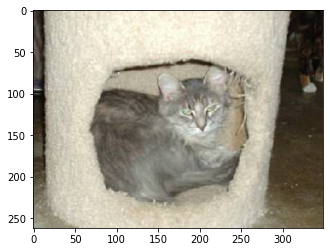

In [ ]:
import matplotlib.image as img

# carregando uma imagem do conjunto de dados 
# viewed_image = img.imread('/content/drive/MyDrive/images_DogsVsCats/train/cat.11073.jpg') 
viewed_image = img.imread('/content/drive/MyDrive/images_DogsVsCats/train/cat.10133.jpg') 

# visualizando a imagem
plt.imshow(viewed_image)
plt.show();

In [ ]:
# função para realizar busca seletiva da imagem
def selective_search(img, method=None):

    '''
    Essa função tem a finalidade de realizar a segmentação da imagem
    Como padrão, utiliza o método "switchToSelectiveSearchFast()", 
    caso deseja utilizar o método "quality" é só instanciar no seu argumento "method"
    '''
    
    ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
    ss.setBaseImage(img)

    if method == 'quality':
        ss.switchToSelectiveSearchQuality()
    else:
        ss.switchToSelectiveSearchFast()

    bounding = ss.process()
    print(bounding.shape)

    # print(bounding)
    return bounding

In [ ]:
# biblioteca para trabalhar com tempo
import time 

In [ ]:
# utilizando a função "selective_search" na imagem selecionada e seu método padrão, 
# nesse caso, o método "switchToSelectiveSearchQuality()"
start = time.time()
selective_search(viewed_image)
end = time.time()

print(f'tempo de execução: {end - start:.2f} s')

(420, 4)
tempo de execução: 1.40 s


In [ ]:
# %%time
# selective_search(viewed_image)

In [ ]:
# utilizando a função "selective_search" na imagem selecionada e instanciando o método "quality"
start = time.time()
selective_search(viewed_image, method='quality')
end = time.time()

print(f'tempo de execução: {end - start:.2f} s')

(1255, 4)
tempo de execução: 3.86 s


In [ ]:
# %%time
# selective_search(viewed_image, method='quality')

In [ ]:
# função para plotar as caixas delimitadoras
def plot_boxes(image, bounding, k=10):
    rand = bounding[np.random.randint(low=0, high = bounding.shape[0], size=k),]
    output = image.copy()

    for (a, b, w, h) in bounding[0:100,]:
        color = [np.random.randint(0, 255) for j in range(0, 3)]
        cv2.rectangle(output, (a, b), (a + w, b + h), color, 2)

    plt.imshow(output)

In [ ]:
# dimensão da segmentação
bounding = selective_search(viewed_image, method='quality')

(1255, 4)


tempo de execução: 0.03 s



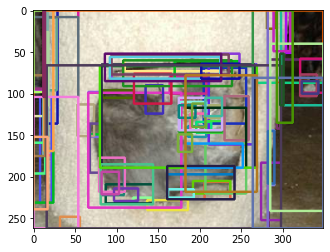

In [ ]:
# com a função "plot_boxes" plotando a segmentação da imagem e o seu tempo de execução 
start = time.time()
plot_boxes(viewed_image, bounding)
end = time.time()

print(f'tempo de execução: {end - start:.2f} s\n')

In [ ]:
# %%time
# plot_boxes(viewed_image, bounding)

In [ ]:
# biblioteca para acessar o OS (sistema operacional)
import os

In [ ]:
# função para extrair região de interesse, converter e redimensionar a imagem para 224x224
def looking_regions_interest(image, bounding, save=False):
    sub_imgs = [] 
    boxes = [] 
    H, W = image.shape[:2] 

    for ind,(x, y, w, h) in enumerate(bounding):
        if w / float(W) < 0.1 or h / float(H) < 0.1: 
            continue

        roi = image[y:y + h, x:x + w]        
        roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
        # roi = cv2.resize(roi, (224, 224))
        sub_imgs.append(roi)
        boxes.append((x, y, w, h))

        if save == True:
            try: 
                os.mkdir('temp')
            except: 
                pass
            
            cv2.imwrite('temp/sub_img{}.jpg'.format(ind + 1), roi)
       
    return sub_imgs, boxes 

In [ ]:
# %%time
subimages, boxes = looking_regions_interest(viewed_image, bounding, save=True)
subimages = np.array(subimages, dtype=object)
print(f'Dimensão das sub-imagens: {subimages.shape}')

Dimensão das sub-imagens: (538,)


In [ ]:
# visualizando o diretório principal
%ls

drive/  sample_data/  temp/


In [ ]:
# todas as imagens da pesquisa realizadas pela função "looking_regions_interest" foram salvas na pasta "temp"
len(os.listdir('temp')) # contabilizando a quantidade de regiões selecionadas

538

In [ ]:
# visualizando o conteúdo da pasta "temp"
!ls temp/

sub_img1000.jpg  sub_img1191.jpg  sub_img362.jpg  sub_img75.jpg
sub_img1002.jpg  sub_img1192.jpg  sub_img372.jpg  sub_img761.jpg
sub_img1003.jpg  sub_img1193.jpg  sub_img382.jpg  sub_img762.jpg
sub_img1006.jpg  sub_img1194.jpg  sub_img385.jpg  sub_img763.jpg
sub_img1007.jpg  sub_img1196.jpg  sub_img38.jpg   sub_img764.jpg
sub_img1009.jpg  sub_img1197.jpg  sub_img392.jpg  sub_img765.jpg
sub_img1010.jpg  sub_img1198.jpg  sub_img397.jpg  sub_img770.jpg
sub_img1014.jpg  sub_img1199.jpg  sub_img398.jpg  sub_img771.jpg
sub_img1015.jpg  sub_img1200.jpg  sub_img403.jpg  sub_img773.jpg
sub_img1016.jpg  sub_img1201.jpg  sub_img404.jpg  sub_img774.jpg
sub_img1019.jpg  sub_img1205.jpg  sub_img415.jpg  sub_img776.jpg
sub_img1020.jpg  sub_img1206.jpg  sub_img420.jpg  sub_img777.jpg
sub_img1023.jpg  sub_img1207.jpg  sub_img421.jpg  sub_img778.jpg
sub_img102.jpg	 sub_img1208.jpg  sub_img425.jpg  sub_img77.jpg
sub_img1030.jpg  sub_img1209.jpg  sub_img427.jpg  sub_img782.jpg
sub_img1031.jpg  sub_img120.

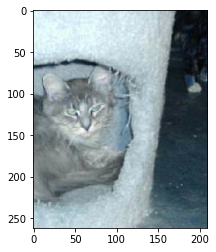

In [ ]:
# plotando a última imagem segmentada
plt.imshow(subimages[-1]);

In [ ]:
# contabilizando a quantidade de elementos da "subimages"
len(subimages)

538

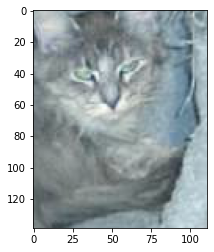

In [ ]:
# visualizando uma imagem aleatória da segmentação
random_image = np.random.randint(low=0, high=len(subimages))
plt.imshow(subimages[random_image]);

In [ ]:
# visualizando os dados do objeto 
subimages[random_image]

array([[[183, 195, 195],
        [174, 186, 186],
        [175, 185, 185],
        ...,
        [125, 145, 150],
        [136, 156, 161],
        [167, 187, 192]],

       [[175, 187, 189],
        [171, 183, 183],
        [175, 185, 185],
        ...,
        [127, 147, 152],
        [145, 165, 170],
        [169, 189, 194]],

       [[170, 182, 184],
        [175, 187, 189],
        [179, 189, 189],
        ...,
        [133, 153, 158],
        [155, 175, 180],
        [169, 189, 194]],

       ...,

       [[118, 128, 128],
        [118, 128, 128],
        [121, 131, 131],
        ...,
        [181, 197, 204],
        [179, 193, 199],
        [175, 189, 195]],

       [[121, 131, 131],
        [121, 131, 131],
        [123, 133, 133],
        ...,
        [188, 201, 209],
        [183, 197, 203],
        [179, 193, 199]],

       [[128, 138, 138],
        [127, 137, 137],
        [124, 134, 134],
        ...,
        [192, 205, 213],
        [184, 198, 204],
        [180, 192, 198]]

In [ ]:
# importando a biblioteca 
import tensorflow as tf

# importando as funções
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

In [ ]:
# instanciando o objeto, nesse caso uma imagem, e nomeando o objeto como "img"
img = tf.keras.preprocessing.image.load_img('/content/temp/sub_img1002.jpg', target_size=(224,224))

# transformando o objeto em uma matriz (array)
img_array = img_to_array(img)

# realizando o re-dimensão do objeto "img_array"
img_array = img_array.reshape((1,224,224,3))

# realizando o pré-processamento do objeto "img_array"
img_trash = preprocess_input(img_array)

In [ ]:
# tipo do objeto
type(img_trash)

numpy.ndarray

In [ ]:
# instanciando o modelo
model = VGG19()

# realizando a predição da imagem
y_hat = model.predict(img_trash)

# utilizando o método "decode_predictions" para retornar a probabilidade de qual rótulo (label) a imagem pertence
label = decode_predictions(y_hat, top=10)
label   # visualizando a predição das probabilidades

49152/35363 [=========================================] - 0s 0us/step


[[('n09288635', 'geyser', 0.080487885),
  ('n02120079', 'Arctic_fox', 0.06597803),
  ('n02114548', 'white_wolf', 0.05777293),
  ('n04589890', 'window_screen', 0.0445867),
  ('n02484975', 'guenon', 0.026964642),
  ('n02326432', 'hare', 0.02631417),
  ('n02328150', 'Angora', 0.02457861),
  ('n02114367', 'timber_wolf', 0.018841228),
  ('n02493509', 'titi', 0.016865868),
  ('n02112350', 'keeshond', 0.012459408)]]

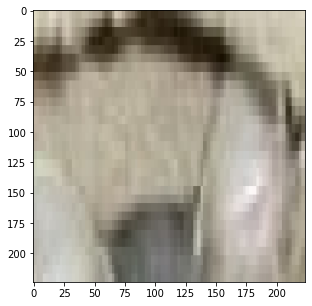

In [ ]:
# visualizando a imagem real
plt.figure(figsize=(8,5))
plt.imshow(img);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


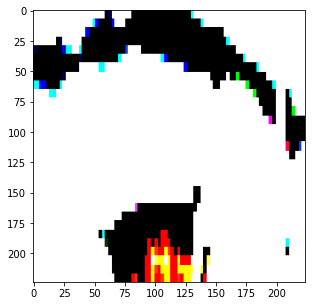

In [ ]:
# visualizando a imagem pré-processada
plt.figure(figsize=(8,5))
plt.imshow(img_trash[0,:,:,:]);

In [ ]:
# função para realizar o pré-processamento de imagem
def image_preprocessing(path_image):
    image = tf.keras.preprocessing.image.load_img(path_image, target_size=(224,224))
    img_array = img_to_array(image)
    img_array = img_array.reshape((1,224,224,3))
    image_data = preprocess_input(img_array)

    return image, image_data

In [ ]:
# com a função ".random.choice()" da biblioteca NumPy e passando com argumento biblioteca OS 
# acessando o diretório "temp" e realizando a seleção aleatória de 10 imagens
images_selection = np.random.choice(os.listdir('temp'), 10)

In [ ]:
# visualizando o conteúdo do objeto instanciado
images_selection

array(['sub_img597.jpg', 'sub_img267.jpg', 'sub_img1081.jpg',
       'sub_img1156.jpg', 'sub_img1173.jpg', 'sub_img1119.jpg',
       'sub_img1047.jpg', 'sub_img5.jpg', 'sub_img583.jpg',
       'sub_img62.jpg'], dtype='<U15')

In [ ]:
# função para realizar a classificação das imagens do objeto
def image_classification(imgs):
    
    for img in imgs:
        # utilizando a função para realizar o preprocessamento das imagens
        img, img_input = image_preprocessing('temp/' + img)
        y_hat = model.predict(img_input)
        label = decode_predictions(y_hat, top=3)
        plt.imshow(img)
        plt.show()

        print(f'{label}\n\n')

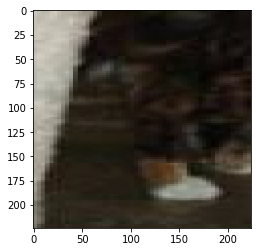

[[('n04589890', 'window_screen', 0.117952205), ('n02120079', 'Arctic_fox', 0.07488883), ('n09288635', 'geyser', 0.048907902)]]




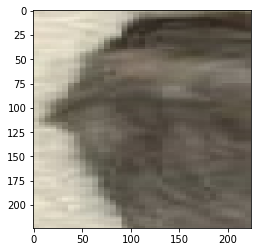

[[('n02096437', 'Dandie_Dinmont', 0.02999999), ('n02106662', 'German_shepherd', 0.026763892), ('n02112350', 'keeshond', 0.02420514)]]




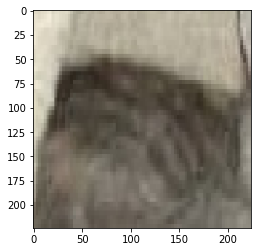

[[('n02090622', 'borzoi', 0.0362567), ('n02087046', 'toy_terrier', 0.030962426), ('n02095314', 'wire-haired_fox_terrier', 0.022382194)]]




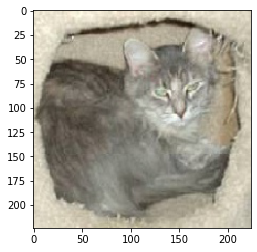

[[('n02123045', 'tabby', 0.2343484), ('n02342885', 'hamster', 0.1616661), ('n02124075', 'Egyptian_cat', 0.11661608)]]




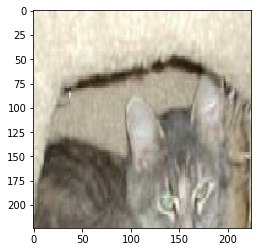

[[('n02441942', 'weasel', 0.04543796), ('n01494475', 'hammerhead', 0.025990779), ('n03804744', 'nail', 0.025045304)]]




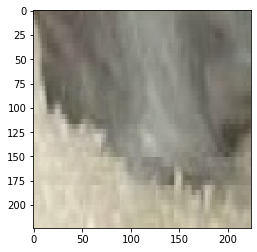

[[('n02114367', 'timber_wolf', 0.03952052), ('n02114548', 'white_wolf', 0.03612172), ('n02326432', 'hare', 0.028159495)]]




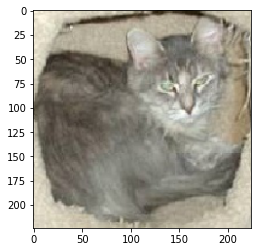

[[('n02123045', 'tabby', 0.20717303), ('n02124075', 'Egyptian_cat', 0.14894645), ('n02342885', 'hamster', 0.1261989)]]




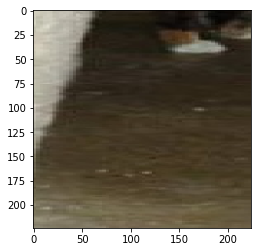

[[('n09288635', 'geyser', 0.06302833), ('n02111889', 'Samoyed', 0.051391717), ('n02111500', 'Great_Pyrenees', 0.03343356)]]




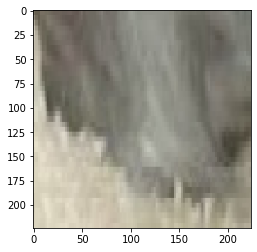

[[('n02114367', 'timber_wolf', 0.034638904), ('n02114548', 'white_wolf', 0.030786391), ('n02326432', 'hare', 0.025149165)]]




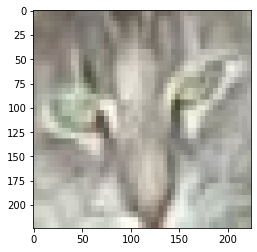

[[('n02114367', 'timber_wolf', 0.08546684), ('n04589890', 'window_screen', 0.08288933), ('n02114548', 'white_wolf', 0.052679453)]]




In [ ]:
# realizando a classificação das imagens com a função "image_classification"
image_classification(images_selection)